<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week-2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [52]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [58]:
# type your code here

df_malaria = pd.read_csv('malaria.csv')

df_malaria.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_malaria.shape

(127, 16)

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# type your code here

df_malaria[df_malaria.isnull().sum(axis=1) == df_malaria.shape[1]]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_malaria[df_malaria.isnull().sum(axis=1) == df_malaria.shape[1]].index

Int64Index([4, 21, 39, 99], dtype='int64')

In [83]:
# Second Method

df_malaria[df_malaria.T.isnull().sum() == 16].index

Int64Index([4, 21, 39, 99], dtype='int64')

In [72]:
# Using Logic
a=df_malaria.shape
for i in range(0,a[0],1):
    if df_malaria.iloc[i].isnull().sum() == 16:
        print(i) 

4
21
39
99


In [31]:
# There are 4 rows with Nan Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# Percentage of all Features with Nan Values
(df_malaria.isnull().sum() / len(df_malaria) ) * 100

Cases_Guinea           26.771654
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Cases_Nigeria          70.078740
Cases_Senegal          80.314961
Cases_UnitedStates     42.519685
Cases_Spain            87.401575
Cases_Mali             90.551181
Deaths_Guinea          27.559055
Deaths_Liberia         36.220472
Deaths_SierraLeone     31.496063
Deaths_Nigeria         70.078740
Deaths_Senegal         82.677165
Deaths_UnitedStates    55.118110
Deaths_Spain           87.401575
Deaths_Mali            90.551181
dtype: float64

In [33]:
# type your code here

a= (df_malaria.isnull().sum() / len(df_malaria) ) * 100
a[a>60]

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64

In [116]:
# Another Method
per_morethan_60 = df_malaria.T[(df_malaria.isnull().sum() / len(df_malaria) ) * 100 > 60].index
per_morethan_60

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
df_obg = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]
df_obl = df_malaria[['Cases_Liberia', 'Deaths_Liberia']]
df_obsl = df_malaria[['Cases_SierraLeone', 'Deaths_SierraLeone']]
df_obnig = df_malaria[['Cases_Nigeria', 'Deaths_Nigeria']]

print("Missing values for Guinea:"+ str(df_obg.isnull().sum().sum()))
print("Missing values for Liberia:"+ str(df_obl.isnull().sum().sum()))
print("Missing values for Sierra Leone:"+ str(df_obsl.isnull().sum().sum()))
print("Missing values for Nigeria:"+ str(df_obnig.isnull().sum().sum()))


Missing values for Guinea:69
Missing values for Liberia:90
Missing values for Sierra Leone:80
Missing values for Nigeria:178


In [84]:
# type your code here

# I would prefer to record the country Nigeria to record their observations again as it contains Most Null values percentage
# when compared to others (Advised Based on first Four Countries(Guinea,Liberia,SierraLeone,Nigeria))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

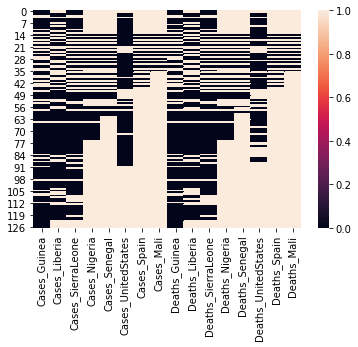

In [95]:
# type your code here

sns.heatmap(df_malaria.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [126]:
# type your code here

df_malaria.dropna(thresh=3)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,516.0,10030.0,NaN,NaN,14.068493,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,516.0,9780.0,NaN,NaN,14.068493,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.000000,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,495.0,8157.0,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,495.0,516.0,NaN,NaN,NaN,14.068493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,14.068493,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,516.0,NaN,NaN,NaN,14.068493,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,516.0,NaN,NaN,NaN,14.068493,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,516.0,NaN,NaN,NaN,14.068493,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [121]:
# type your code here

# Advise Drop Columns Which have more tha 60% Null Values

new_df =df_malaria.drop(per_morethan_60,axis=1)
new_df.shape

(127, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
df_malaria.head(5)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# type your code here

df_malaria['Cases_Liberia'].skew()

0.9491336030709361

In [100]:
df_malaria['Cases_Liberia'].median()

516.0

In [102]:
df_malaria['Cases_Liberia'] =df_malaria['Cases_Liberia'].fillna(df_malaria['Cases_Liberia'].median())

In [123]:
df_malaria['Cases_Liberia'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [104]:
# type your code here

df_malaria['Cases_UnitedStates'].skew()

0.4685235032170701

In [105]:
df_malaria['Cases_UnitedStates'].mean()

14.068493150684931

In [106]:
df_malaria['Cases_UnitedStates'] =df_malaria['Cases_UnitedStates'].fillna(df_malaria['Cases_UnitedStates'].mean())

In [124]:
df_malaria['Cases_UnitedStates'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
df_obg = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]

df_obg['Cases_Guinea'].skew()

1.470798427432212

In [132]:
df_obg['Deaths_Guinea'].skew()

1.1088793090392497

In [133]:
df_obg.fillna(df_obg.median())

,Cases_Guinea,Deaths_Guinea
0,2776.0,1786.0
1,2775.0,1781.0
2,2769.0,1767.0
3,495.0,360.5
4,495.0,360.5
...,...,...
122,103.0,66.0
123,86.0,62.0
124,86.0,60.0
125,86.0,59.0


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [134]:
df_house = pd.read_csv('house.csv')
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

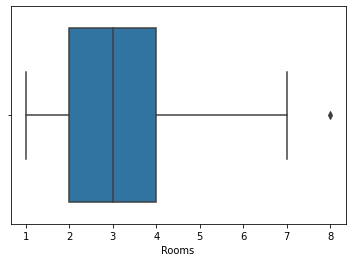

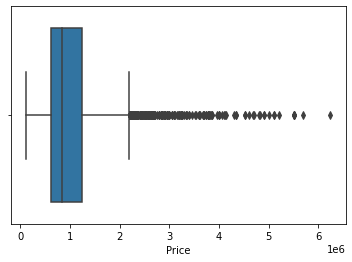

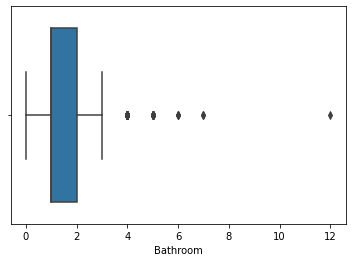

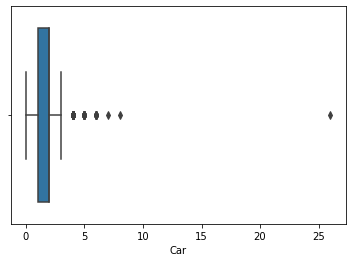

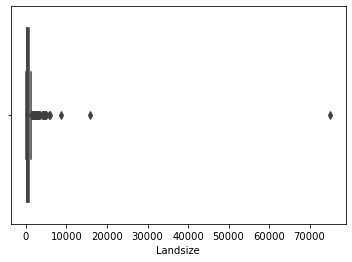

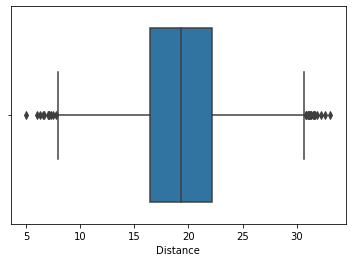

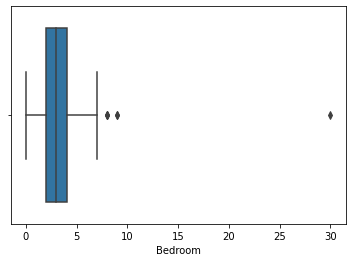

In [141]:
# type your code here

sns.boxplot(data = df_house,x='Rooms')
plt.show()
sns.boxplot(data = df_house,x='Price')
plt.show()
sns.boxplot(data = df_house,x='Bathroom')
plt.show()
sns.boxplot(data = df_house,x='Car')
plt.show()
sns.boxplot(data = df_house,x='Landsize')
plt.show()
sns.boxplot(data = df_house,x='Distance')
plt.show()
sns.boxplot(data = df_house,x='Bedroom')
plt.show()

In [142]:
# We can exempt Rooms Column from the Outlier

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
# type your code here
# IQR = Q3-Q1
#>IQR +1.5IQR and < IQR-1.5INQR

df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [145]:
Q1 = df_house['Car'].quantile(0.25)
Q3 = df_house['Car'].quantile(0.75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR

print("There are",len(df_house[df_house['Car']>UB].Car), "outliers in the column car spots")

print("The outliers are:", df_house[df_house['Car']>UB].Car.unique())


There are 206 outliers in the column car spots
The outliers are: [ 5  4  6  7 26  8]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

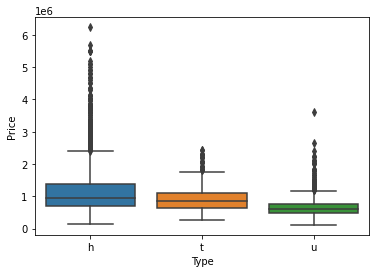

In [147]:
# type your code here

sns.boxplot(data = df_house,x='Type',y='Price')
plt.show()

In [148]:
# Price has more outliers when comparing to Type

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
# type your code here

# zcore <-3 and > 3 outliers x-mean/std

from scipy.stats import zscore
zscore_rooms = zscore(df_house['Rooms'])
df_house.Rooms[((zscore_rooms>3) | (zscore_rooms<-3))].unique()

array([7, 6, 8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here

# IQR or Zcore or box plot

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
# type your code here

Q1 = df_house['Bedroom'].quantile(0.25)
Q3 = df_house['Bedroom'].quantile(0.75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR

df_house[(df_house['Bedroom'] < LB) | (df_house['Bedroom'] > UB)]


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [152]:
average_distance_before = df_house['Distance'].mean()
average_distance_before

19.32834662190515

In [153]:
# type your code here

Q1 = df_house['Distance'].quantile(0.25)
Q3 = df_house['Distance'].quantile(0.75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR

average_distance_after=df_house[(df_house['Distance'] >= LB) & (df_house['Distance'] <= UB)].Distance.mean()
average_distance_after


19.311425554382247

In [154]:
average_distance_before - average_distance_after

0.016921067522904565

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

6


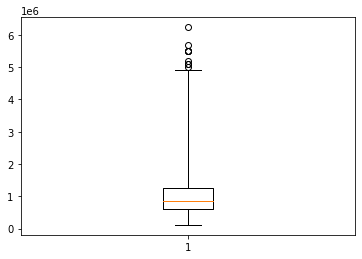

7


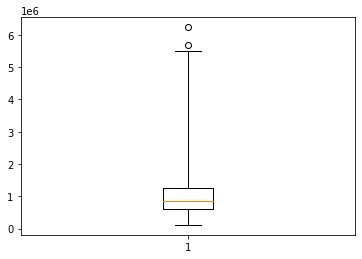

8


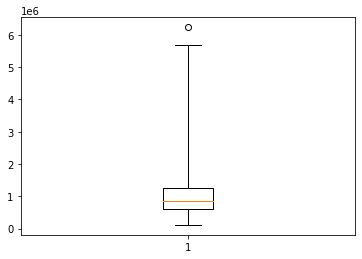

9


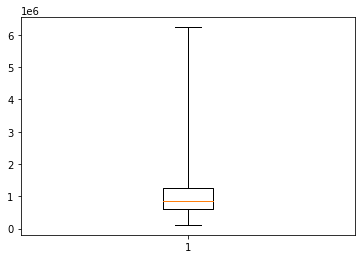

10


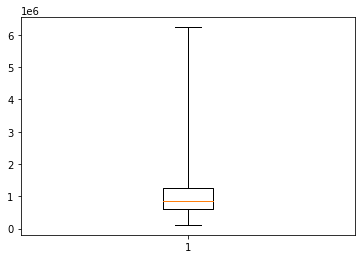

In [158]:
# type your code here
for i in range(6,11):
    print(i)
    plt.boxplot(df_house['Price'],whis=i)
    plt.show()

In [159]:
# All the whis values >=9 will eliminate the outliers

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
# type your code here

def new_feat(dist):

    if (dist >= 5.0) & (dist < 15.0):
        return 'walking_distance'
    if (dist >= 15.0) & (dist < 25.0):
        return 'close_by'
    if (dist > 25.0):
        return 'far_away'

df_house['Distance_level']=df_house['Distance'].map(new_feat)
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance_level
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,far_away
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,close_by
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,close_by
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,close_by
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,close_by


In [162]:
# Second Method

pd.cut(df_house['Distance'], bins=3, labels = ['walking', 'close_by', 'far_away'])

0       far_away
1       close_by
2       close_by
3       close_by
4       close_by
          ...   
4761    close_by
4762    close_by
4763    far_away
4764    close_by
4765     walking
Name: Distance, Length: 4766, dtype: category
Categories (3, object): ['walking' < 'close_by' < 'far_away']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

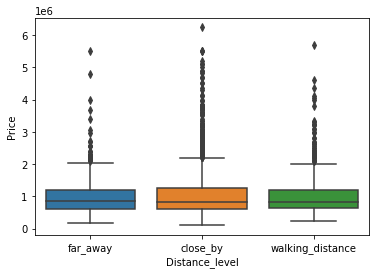

In [164]:
# type your code here
sns.boxplot(x='Distance_level',y='Price',data = df_house)
plt.show()

In [165]:
# Close by Distance Level has more Price when compared others two distance levels/

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [166]:
# type your code here

from sklearn.model_selection import train_test_split
train_price , test_price = train_test_split(df_house['Price'], train_size = 0.80, random_state = 21)
train_price.shape, test_price.shape

((3812,), (954,))